In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
from tools_ryu import mytool
from tools_ryu.mktindex import MarketIndex

In [2]:
cmktcap = pd.read_pickle("Data/cmktcap_data_final.pickle")
cmktcap_reduced = pd.read_pickle("Data/cmktcap_data_reduced.pickle")
binance = pd.read_pickle("Data/binance_data_pp.pickle")

In [3]:
# Initialize the Data
c_mkt = MarketIndex(cmktcap,"coinmarketcap")
c_mkt_reduced = MarketIndex(cmktcap_reduced, "coinmarketcap")
b_mkt = MarketIndex(binance, "binance")

In [4]:
#                  mktcap, volume
group_value = {"M1":[None,None],
               "M2":[1_000_000, None],
               "M3":[1_000_000,1_000_000]}

In [5]:
# 코인 마켓켑 인덱스 생성
market_index_cmktcap = {}
coin_num_cmktcap = {}

for key, value_lst in tqdm(group_value.items()):
    rtn, num = c_mkt.make_market_index(value_lst[0],value_lst[1])
    market_index_cmktcap[key] = rtn
    coin_num_cmktcap[key] = num

100%|██████████| 3/3 [00:18<00:00,  6.21s/it]


In [6]:
# 코인 마켓켑 인덱스 (바이낸스와 컬럼 일치) 생성
market_index_cmktcap_reduced = {}
coin_num_cmktcap_reduced = {}

for key, value_lst in tqdm(group_value.items()):
    rtn, num = c_mkt_reduced.make_market_index(value_lst[0],value_lst[1])
    market_index_cmktcap_reduced[key] = rtn
    coin_num_cmktcap_reduced[key] = num

100%|██████████| 3/3 [00:01<00:00,  1.92it/s]


In [7]:
# 바이낸스 인덱스 생성
market_index_binance = {}
coin_num_binance = {}

for key, value_lst in tqdm(group_value.items()):
    rtn,num = b_mkt.make_market_index(value_lst[0],value_lst[1])
    market_index_binance[key] = rtn
    coin_num_binance[key] = num

100%|██████████| 3/3 [00:01<00:00,  1.90it/s]


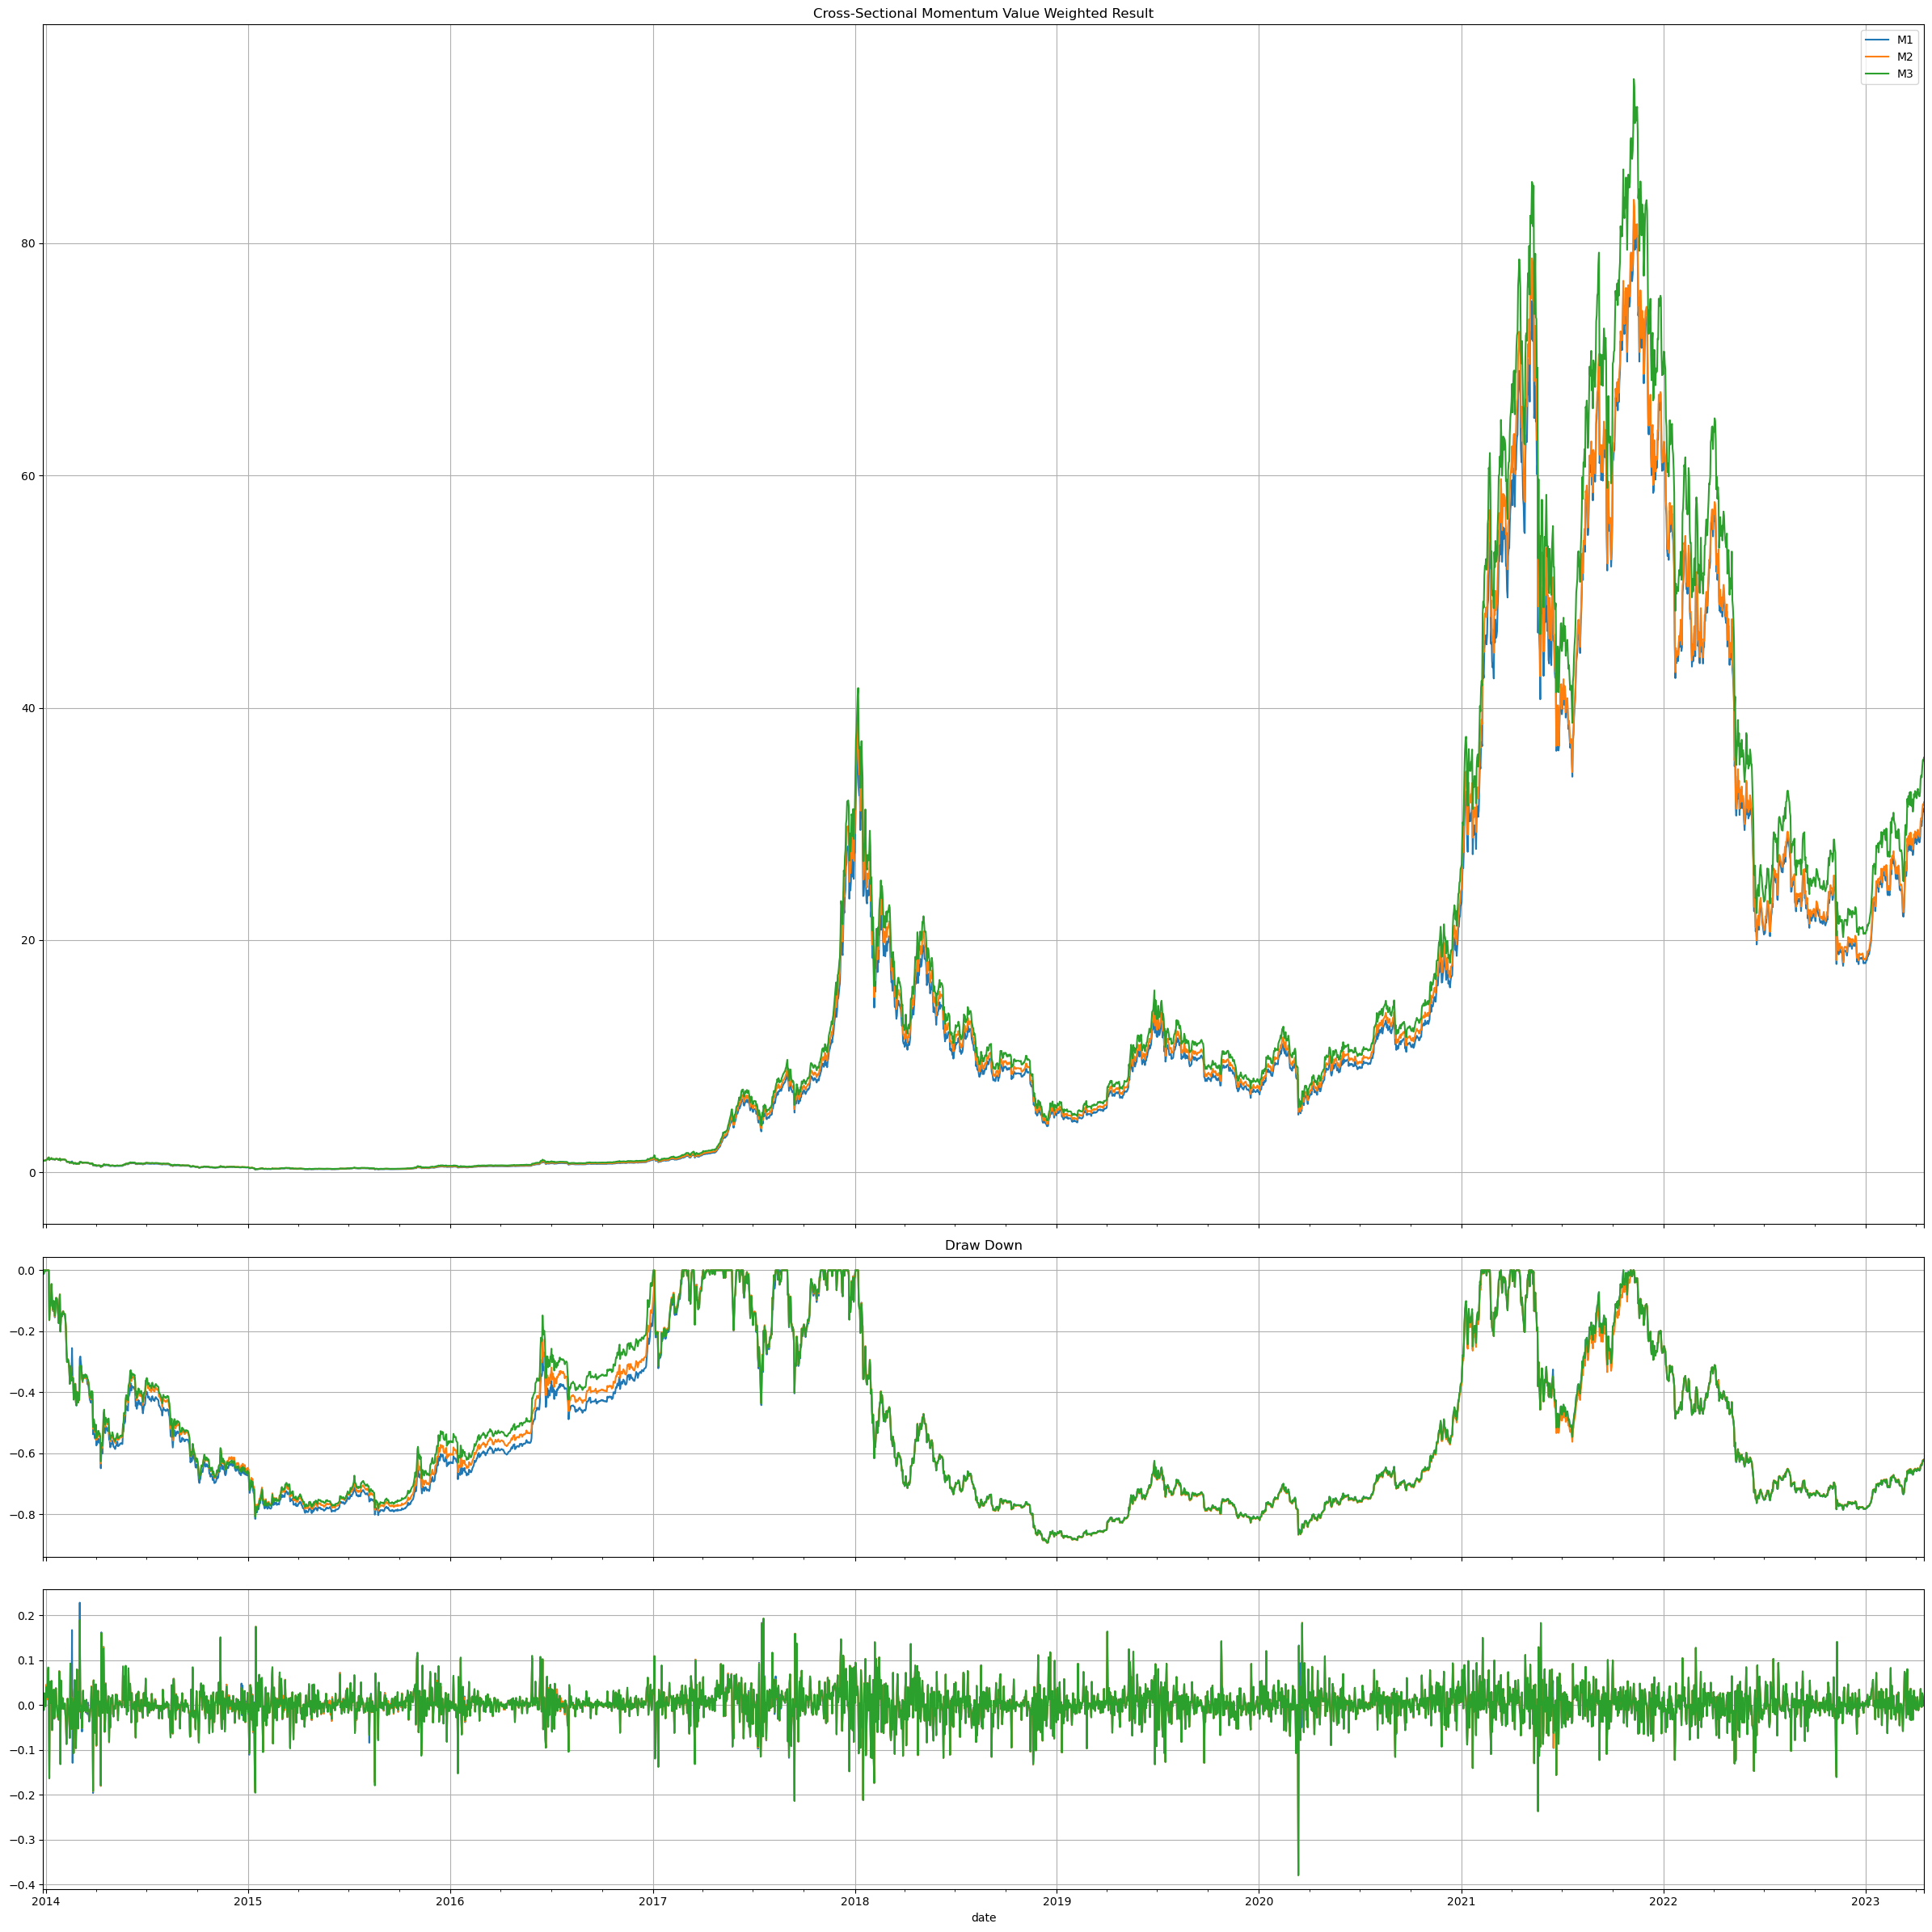

In [8]:
mytool.draw_return_result(market_index_cmktcap, one_plot=True, start_date="2013-12-27")

In [9]:
mytool.print_statistics(market_index_cmktcap, None, start_date="2013-12-27")

,0,1,2
CAGR,44.96%,45.2%,47.010000000000005%
Mean,0.65645,0.65429,0.66896
STD,0.749442,0.743737,0.74701
MDD,0.893,0.893,0.893
Sharpe,0.875918,0.879732,0.895516


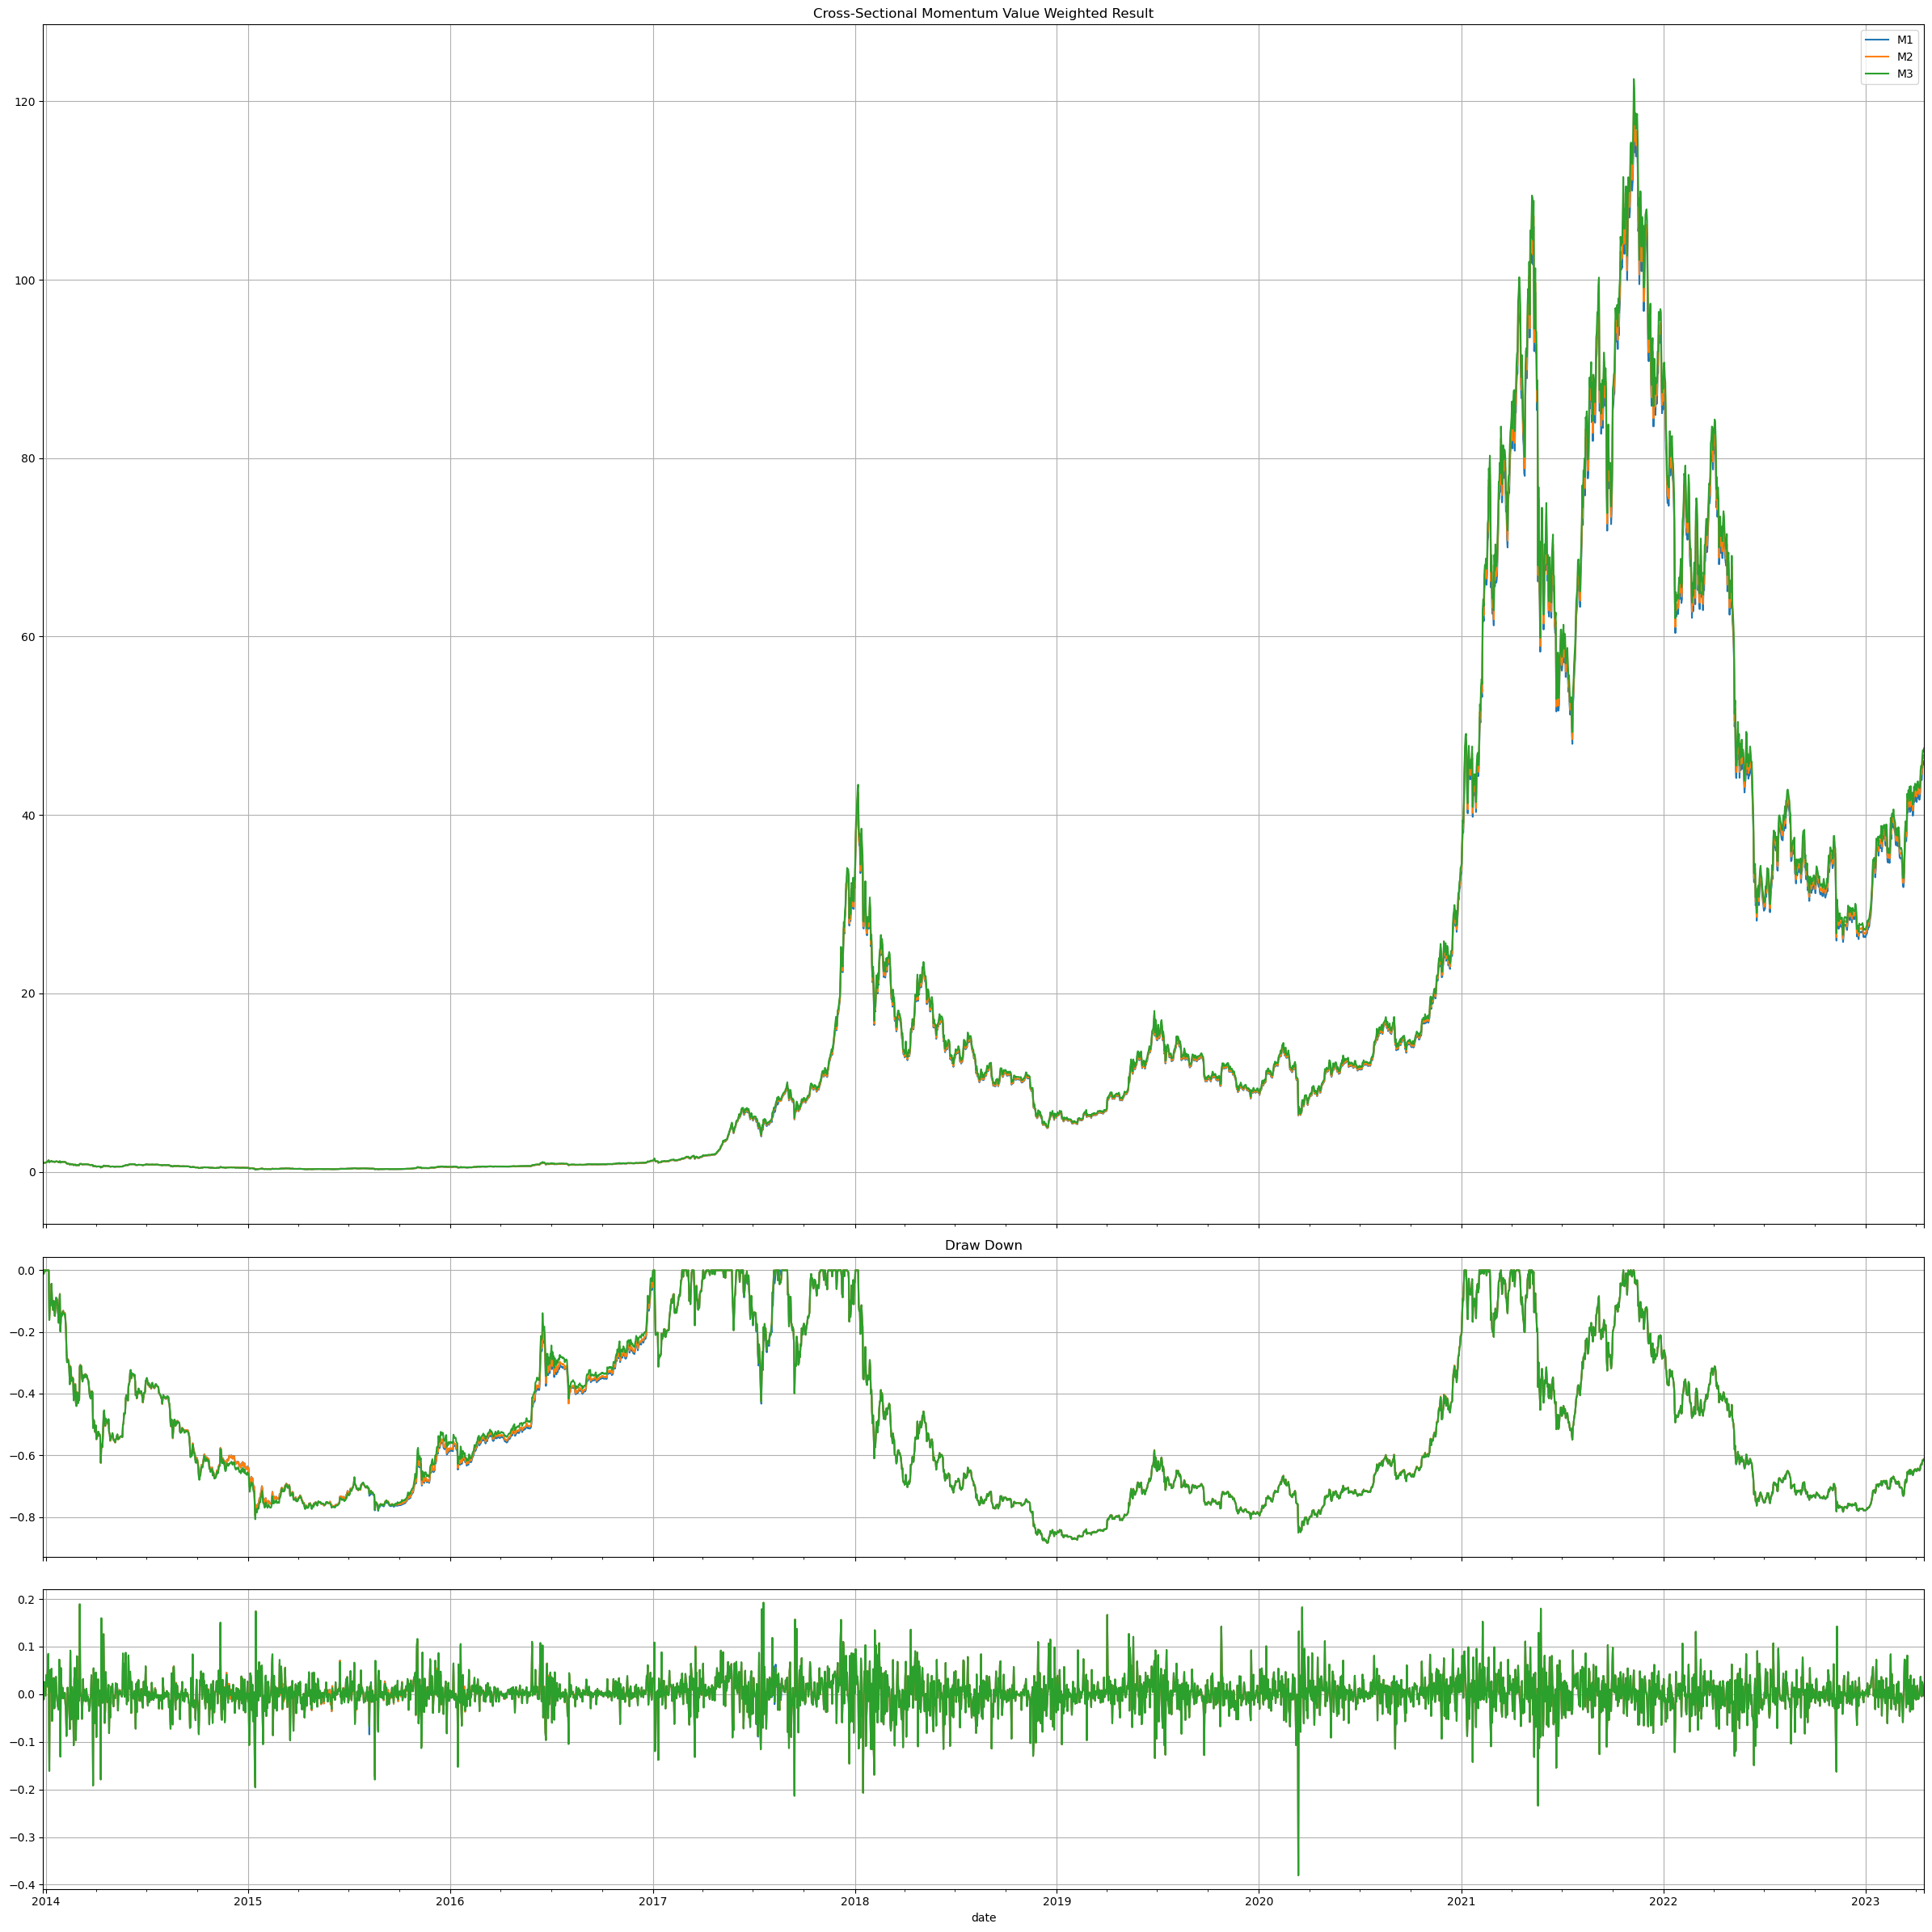

In [10]:
mytool.draw_return_result(market_index_cmktcap_reduced, one_plot=True, start_date="2013-12-27")

In [11]:
mytool.print_statistics(market_index_cmktcap_reduced, None, start_date="2013-12-27")

,0,1,2
CAGR,51.080000000000005%,51.31%,51.580000000000005%
Mean,0.69457,0.69599,0.69961
STD,0.744936,0.744745,0.747261
MDD,0.884,0.884,0.884
Sharpe,0.932389,0.934535,0.936232


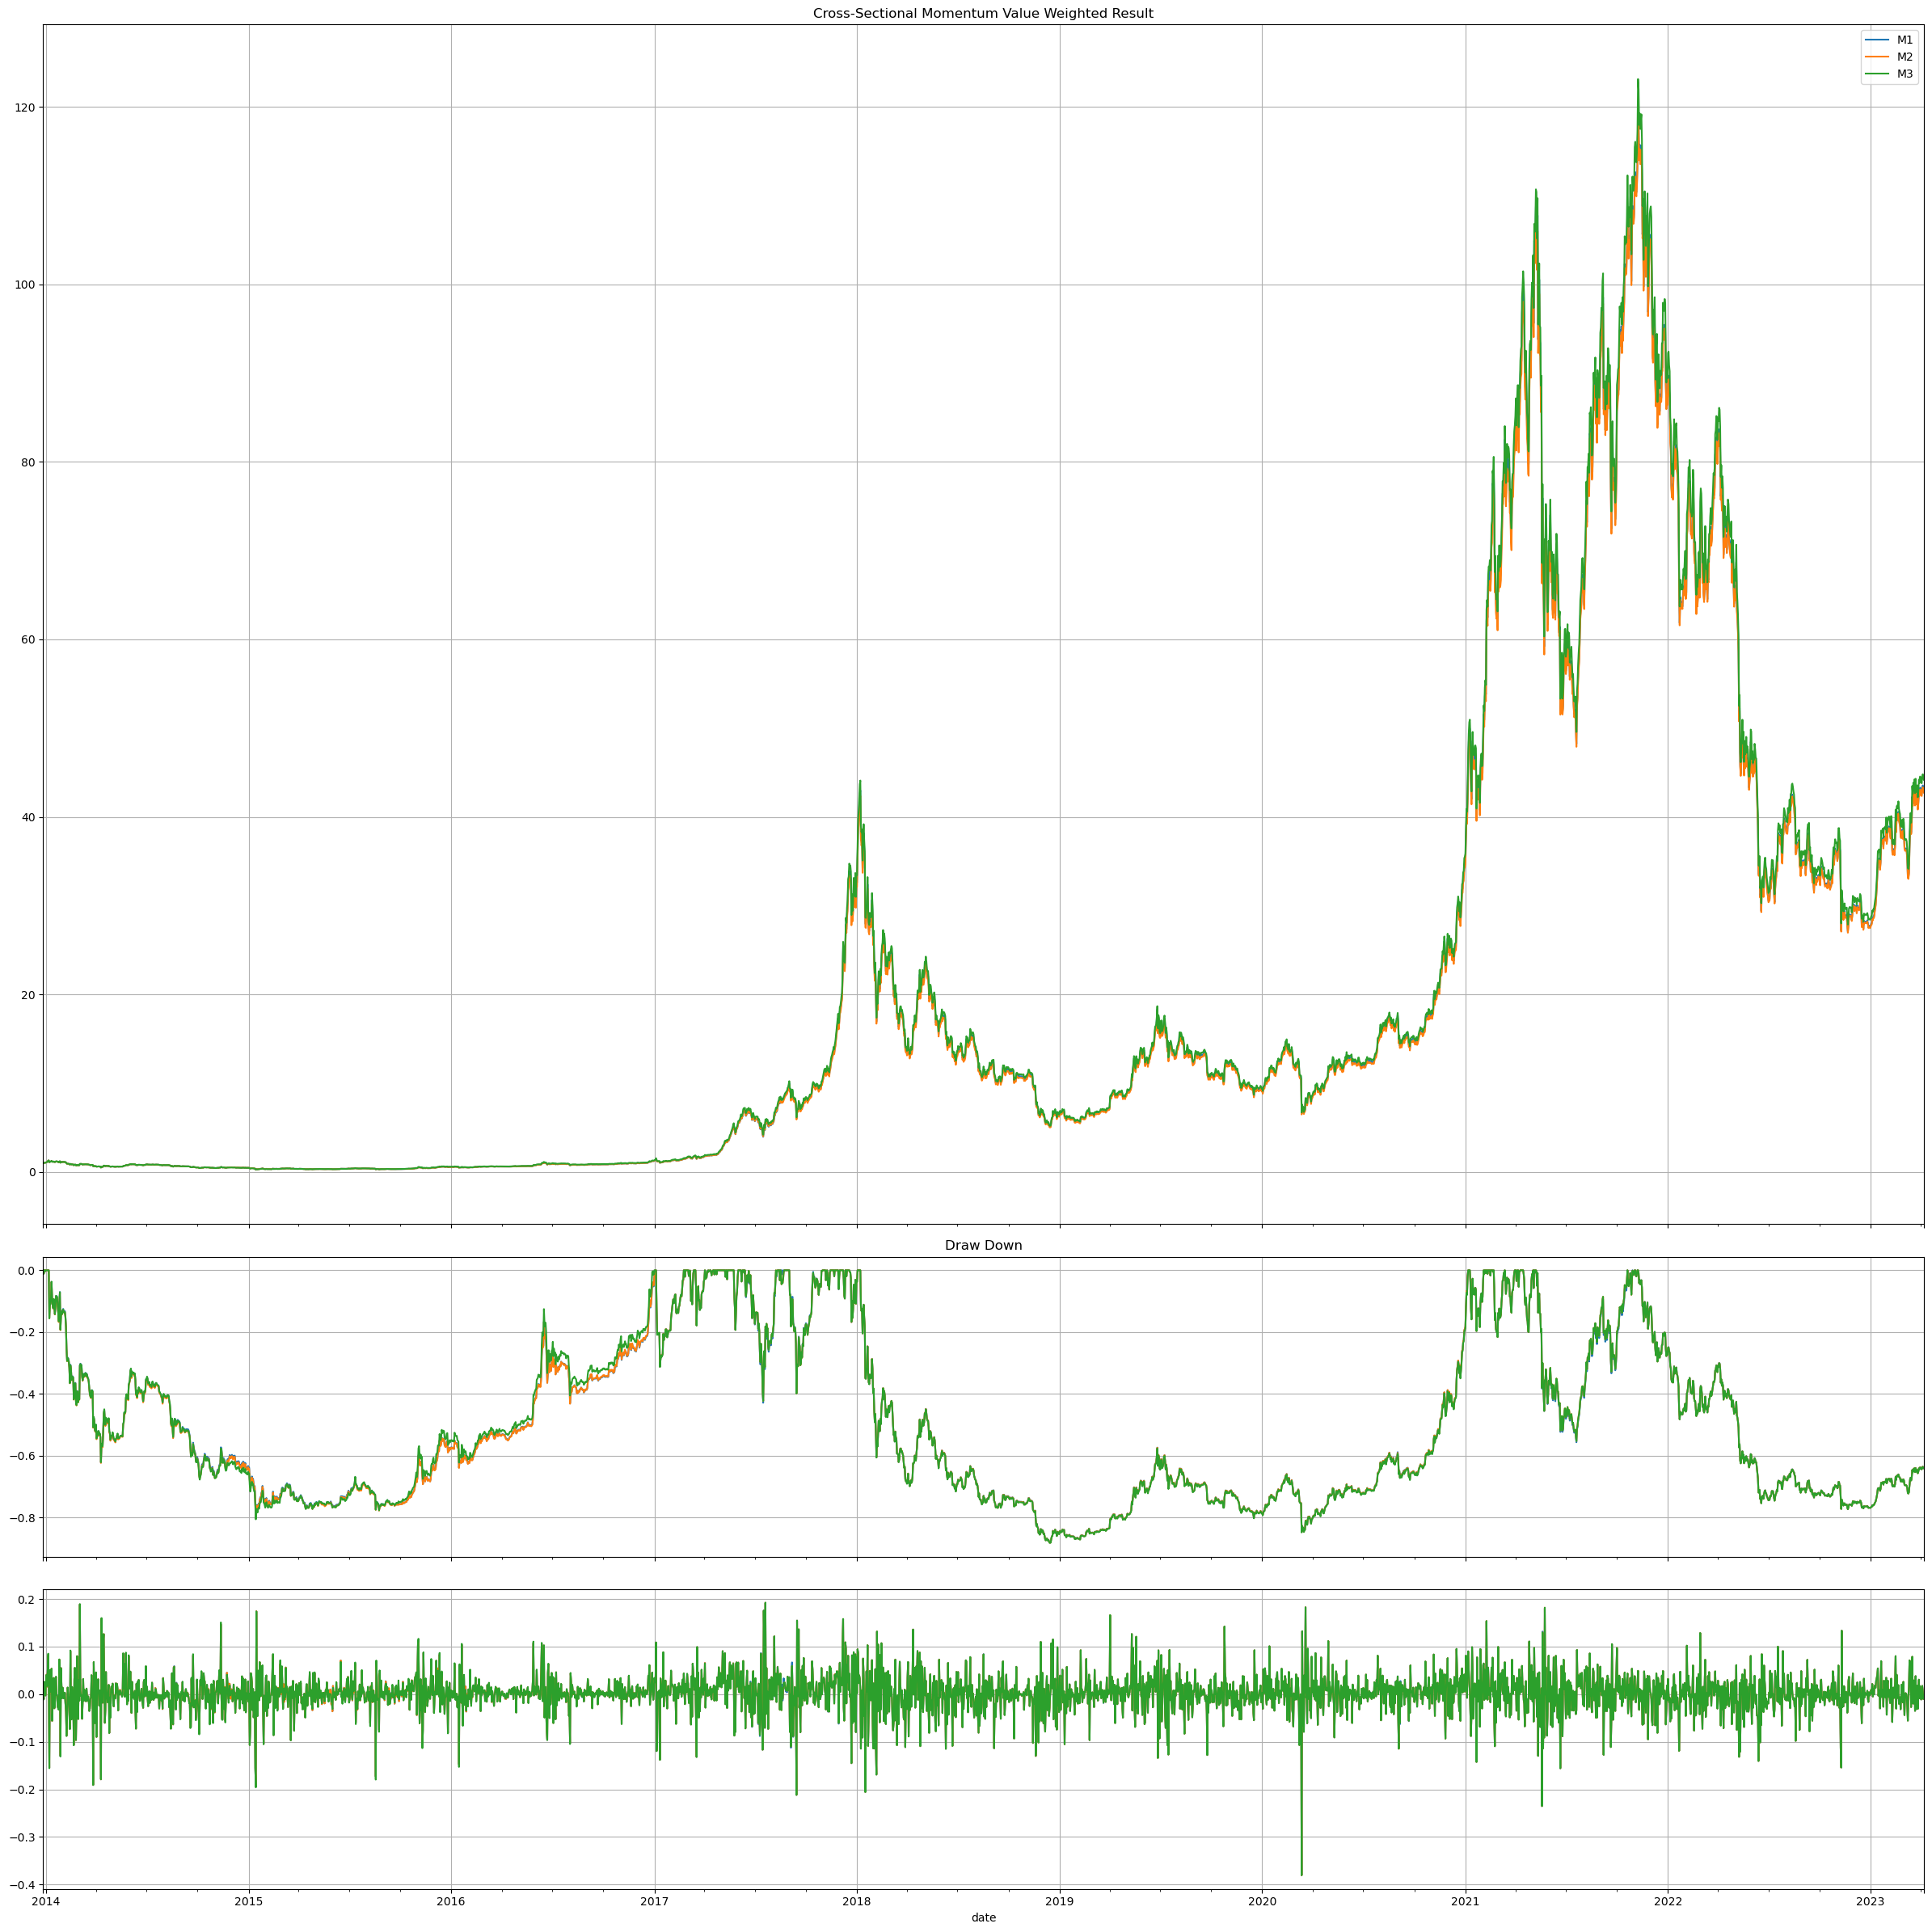

In [12]:
mytool.draw_return_result(market_index_binance, one_plot=True, start_date="2013-12-27")

In [13]:
mytool.print_statistics(market_index_binance, None, start_date="2013-12-27")

,0,1,2
CAGR,50.11%,50.029999999999994%,50.580000000000005%
Mean,0.68593,0.68535,0.69087
STD,0.742055,0.741985,0.744541
MDD,0.882,0.882,0.882
Sharpe,0.924365,0.923671,0.927915


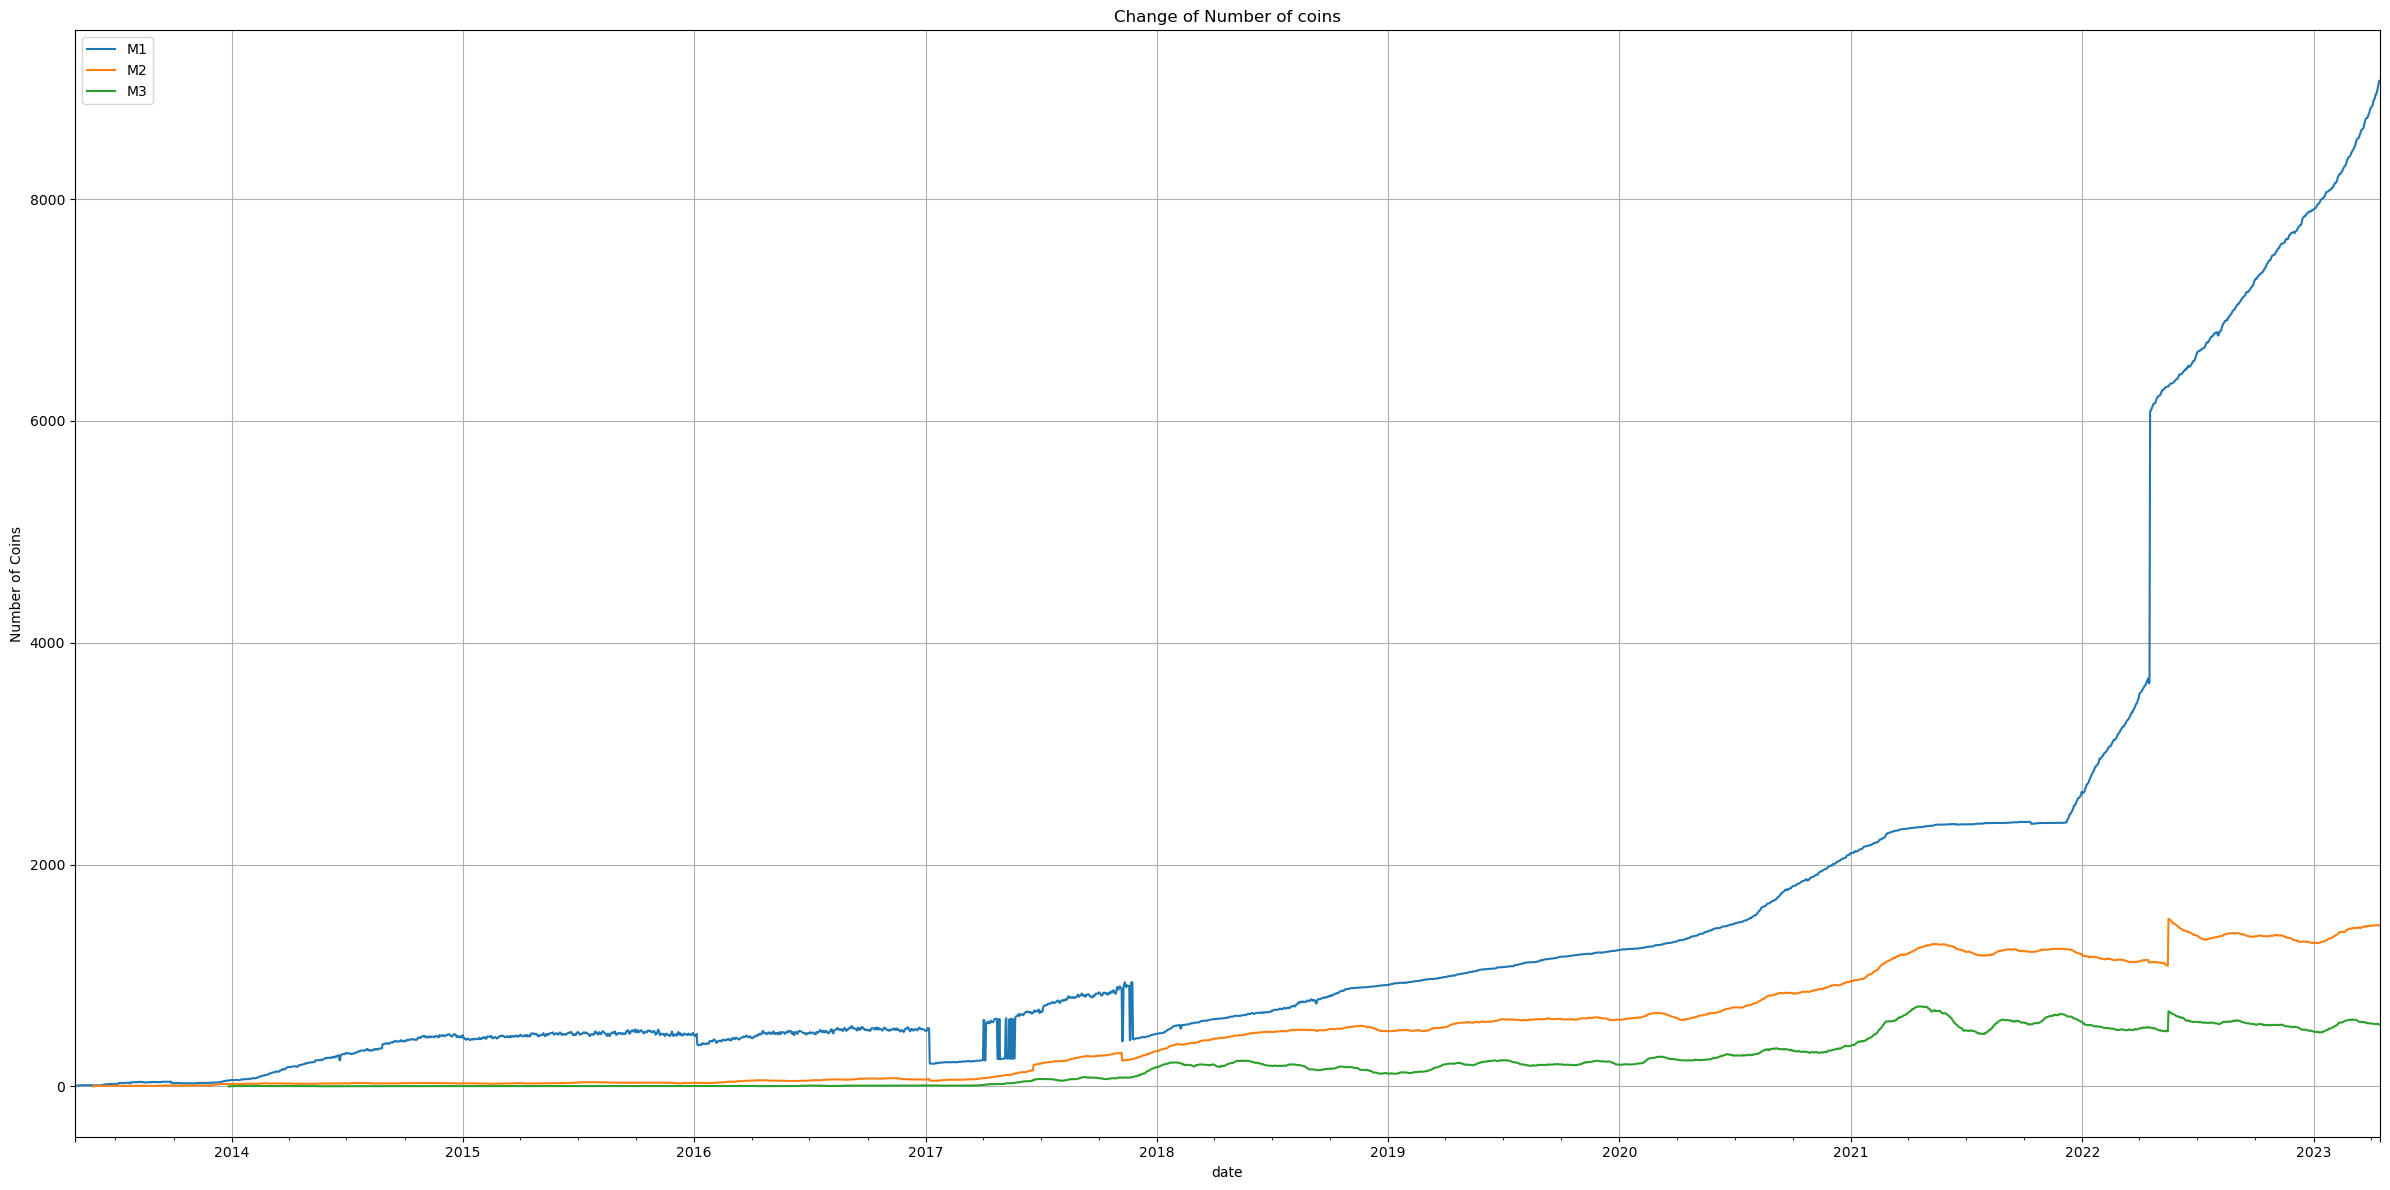

In [14]:
#coin_num_cmktcap, coin_num_cmktcap_reduced, coin_num_binance
mytool.draw_coin_count(coin_num_cmktcap)

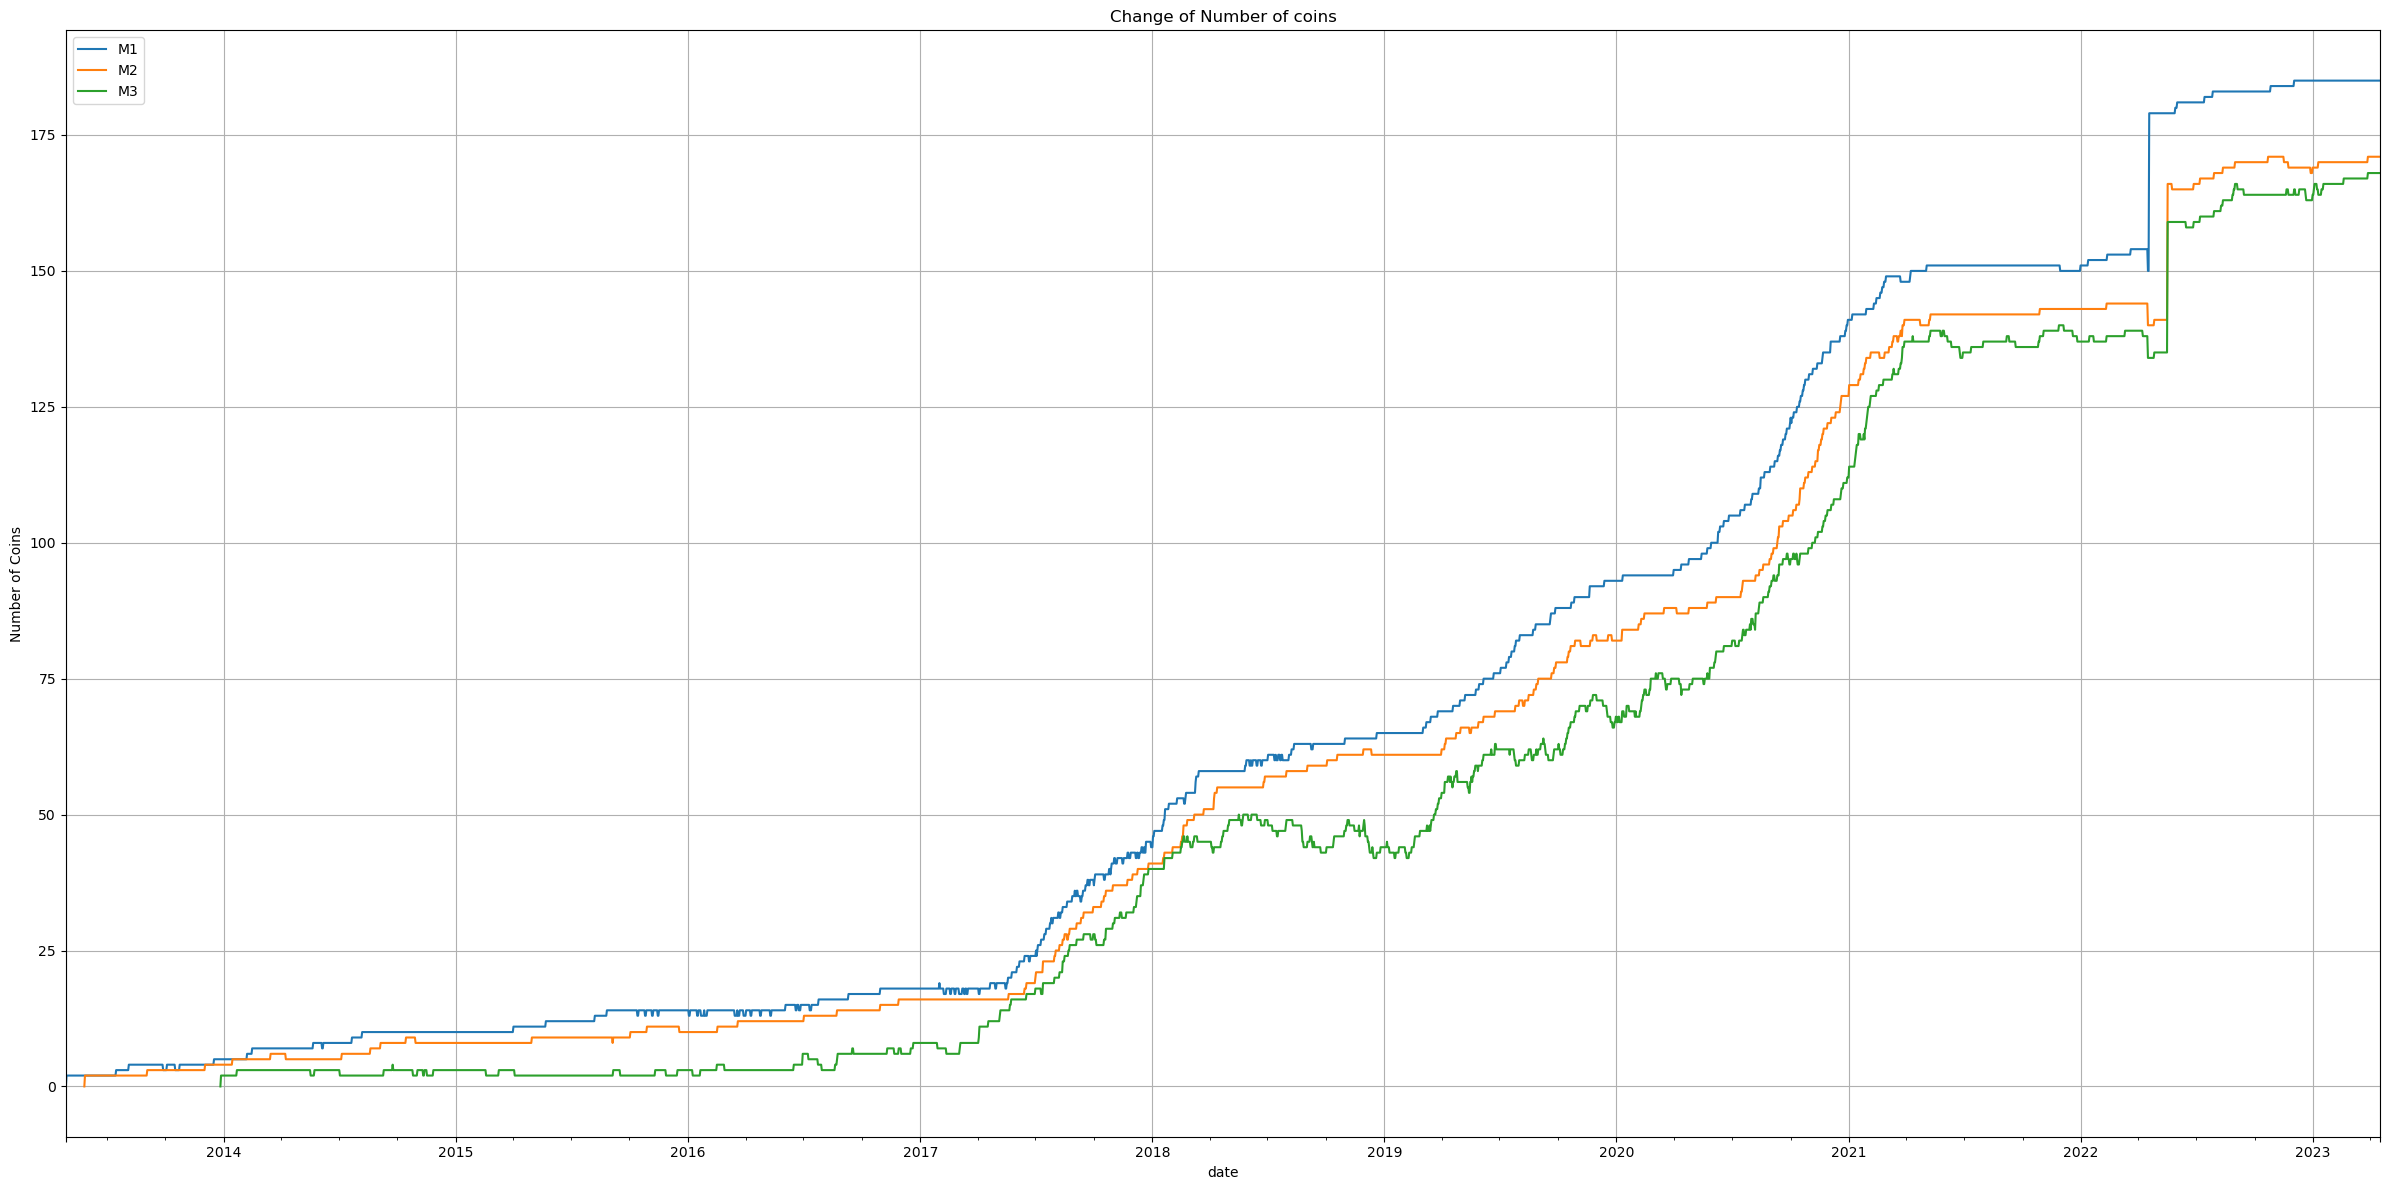

In [15]:
mytool.draw_coin_count(coin_num_cmktcap_reduced)

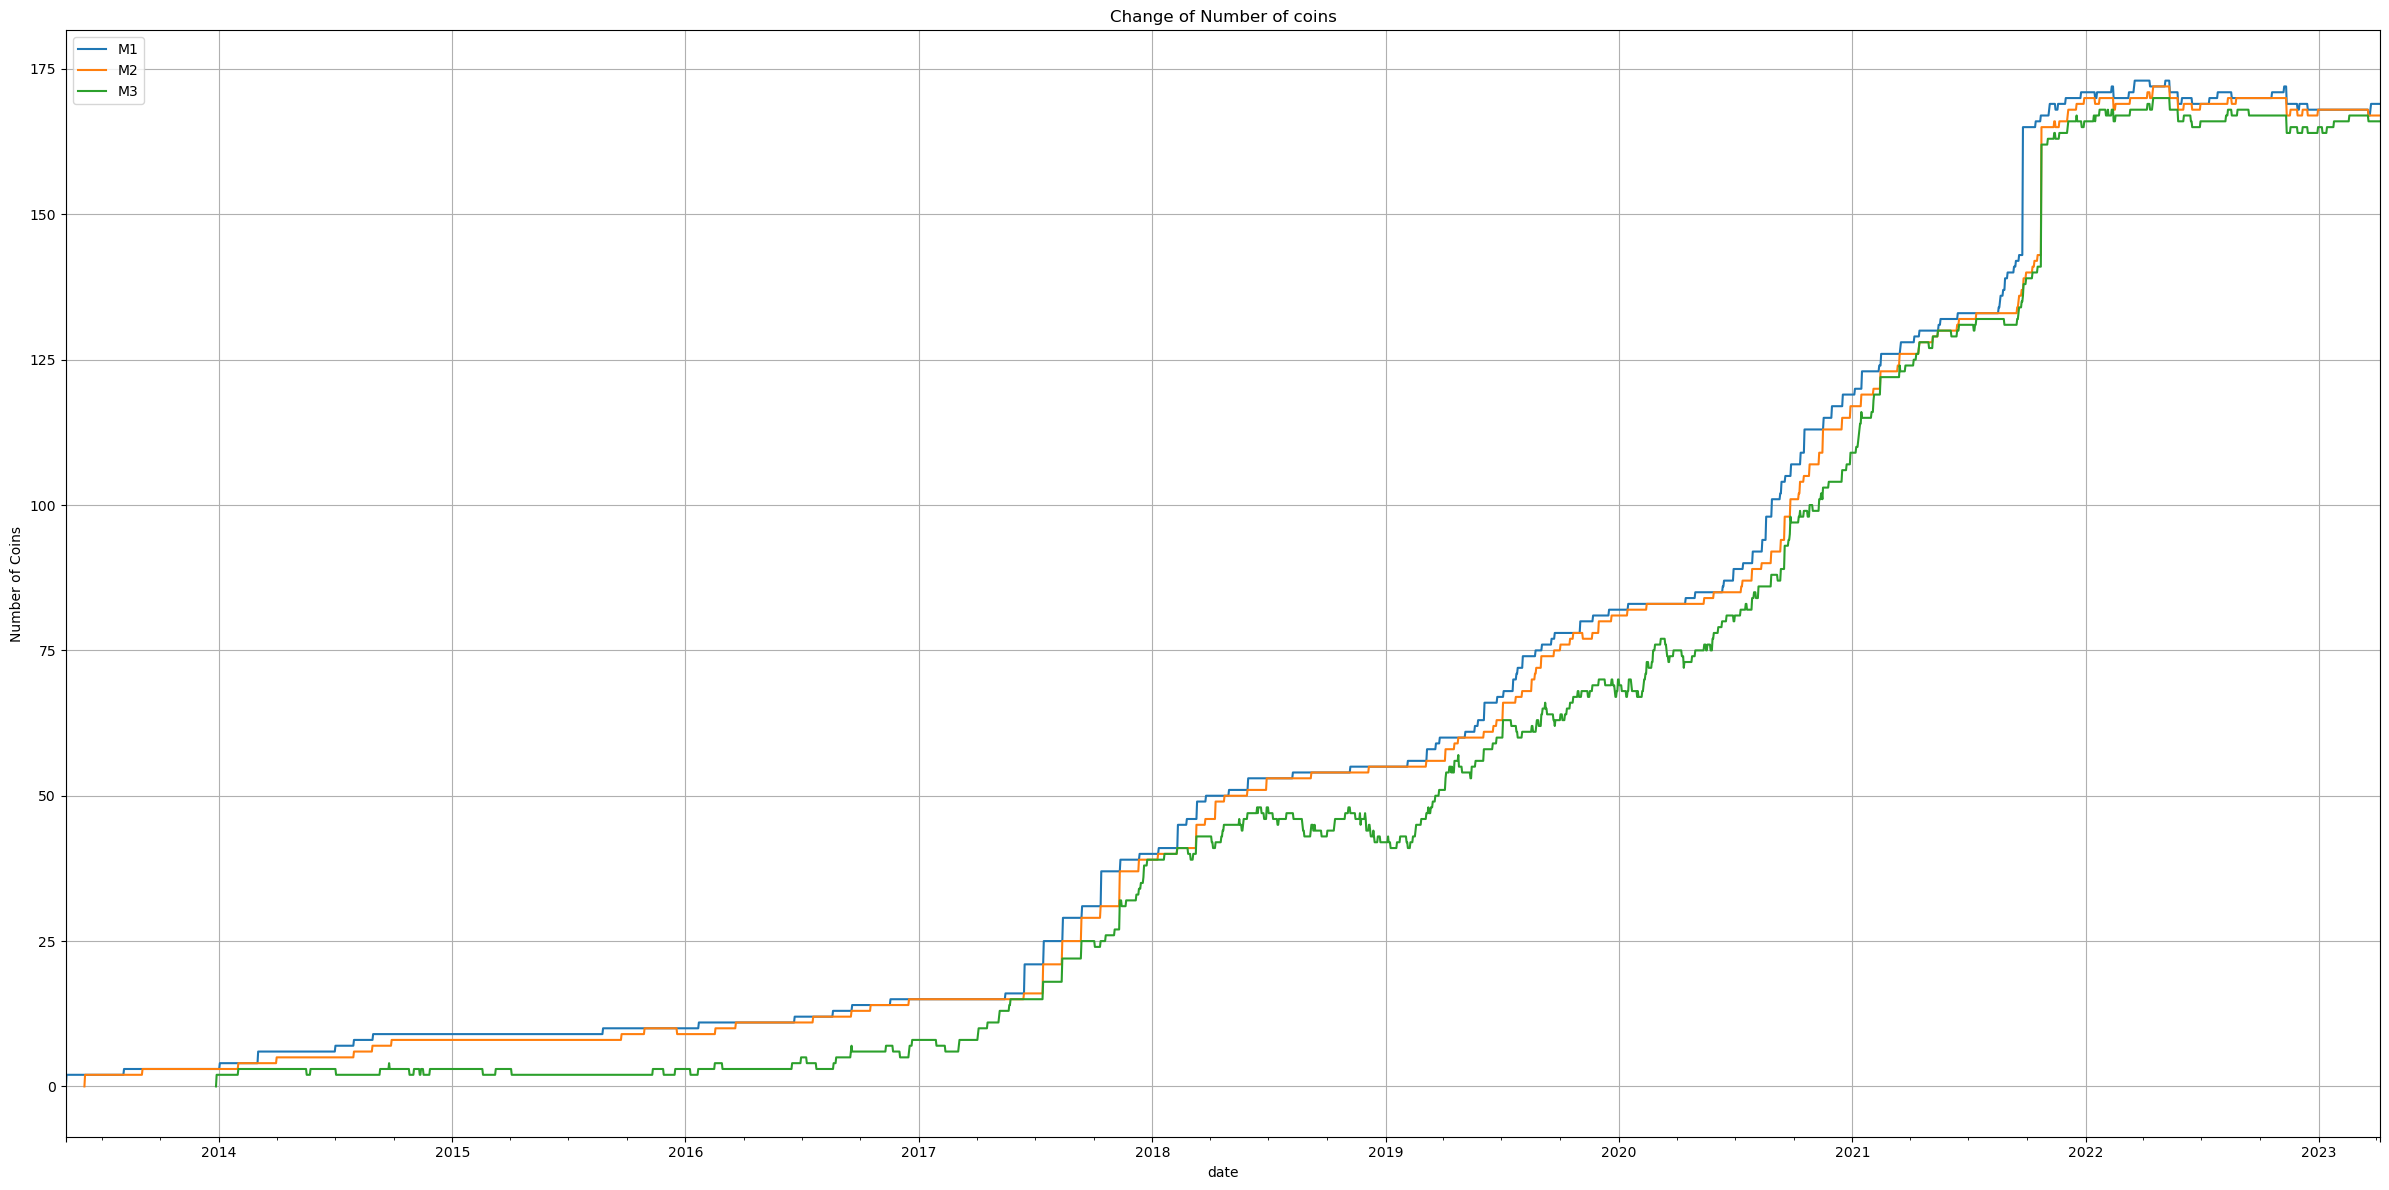

In [16]:
mytool.draw_coin_count(coin_num_binance)